# Aim: Do letters become "more similar" to each other over time?

# Setup

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import lib_dataimport
import lib_processing
import importlib
lib_dataimport = importlib.reload(lib_dataimport)
lib_processing = importlib.reload(lib_processing)

In [3]:
df = lib_dataimport.read_data()
words, word_frequencies = lib_processing.bag_of_words(df)
cosinesim_matrix = lib_processing.cosinesim(word_frequencies)

<AxesSubplot:>

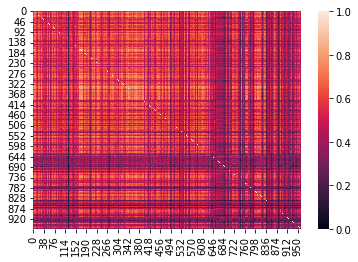

In [4]:
# Plot cosine-similarity matrix
sns.heatmap(cosinesim_matrix)

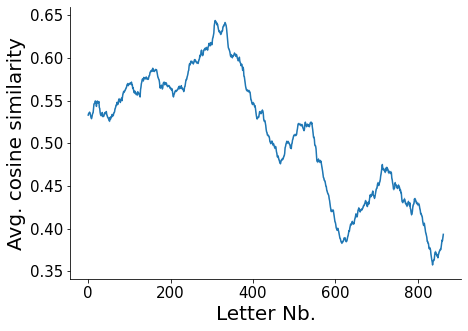

In [5]:
# We now slide a window of size 'window_size' over the 963 letters
# and compute the average pairwise cosine similarity 
window_size = 100

avg_similarities = []
se_similarities = []
nb_letter = range(0, len(cosinesim_matrix)-window_size)
for i in nb_letter:
    # Extract the similarity values from the triangular submatrix
    # from i to i+windowsize, excluding the 1s on diagonal
    submatrix = cosinesim_matrix[i:i+window_size,i:i+window_size]
    similarities = submatrix[np.triu_indices(window_size, k=1)]
    
    # Compute avg and sem
    avg_similarities.append(np.mean(similarities))
    se_similarities.append(sp.stats.sem(similarities))
avg_similarities = np.array(avg_similarities)
se_similarities = np.array(se_similarities)

# Generate plot and make visually more pleasing
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Avg. cosine similarity", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(nb_letter, avg_similarities)
ax.fill_between(nb_letter, avg_similarities-se_similarities, avg_similarities+se_similarities, alpha=.5)